<a href="https://colab.research.google.com/github/sandesh8055/maritime-voyage-disruption-fuel-cost-ml/blob/main/maritime_voyage_disruption_fuel_cost_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vessel Voyage Disruption & Fuel Cost Impact Prediction

## Problem Statement
Maritime voyages are affected by multiple uncertain factors such as
weather conditions, vessel load, port congestion, and crew readiness.
Disruptions during a voyage can lead to delays, increased fuel consumption,
and higher operational costs.

This project aims to:
1. Predict the likelihood of a voyage disruption
2. Estimate the additional fuel cost impact caused by disruptions

The objective is to demonstrate how machine learning can support
risk-aware planning and cost control in maritime operations.

In [1]:
import numpy as np
import pandas as pd

np.random.seed(42)

n_samples = 1500

data = pd.DataFrame({
    "sea_state": np.random.choice(
        ["Calm", "Moderate", "Rough"], n_samples, p=[0.5, 0.35, 0.15]
    ),
    "vessel_load": np.random.choice(
        ["Light", "Medium", "Heavy"], n_samples, p=[0.3, 0.4, 0.3]
    ),
    "port_congestion": np.random.choice(
        ["Low", "Medium", "High"], n_samples, p=[0.4, 0.35, 0.25]
    ),
    "engine_efficiency": np.random.randint(70, 101, n_samples),  # %
    "crew_experience": np.random.choice(
        ["Low", "Experienced"], n_samples, p=[0.35, 0.65]
    ),
    "route_distance_nm": np.random.randint(300, 3500, n_samples)  # nautical miles
})

Create Voyage Disruption Logic

In [2]:
disruption_score = (
    data["sea_state"].map({"Calm": 0.1, "Moderate": 0.3, "Rough": 0.7}) +
    data["vessel_load"].map({"Light": 0.1, "Medium": 0.3, "Heavy": 0.6}) +
    data["port_congestion"].map({"Low": 0.1, "Medium": 0.4, "High": 0.7}) +
    (1 - data["engine_efficiency"] / 100) * 1.2 +
    data["crew_experience"].map({"Experienced": 0.1, "Low": 0.5}) +
    (data["route_distance_nm"] / 3500) * 0.6
)

data["voyage_disruption"] = (disruption_score > 2.0).astype(int)

Create Fuel Cost Impact

In [3]:
data["extra_fuel_cost_usd"] = (
    data["route_distance_nm"] * np.random.uniform(2.5, 4.0, n_samples) +
    data["voyage_disruption"] * np.random.uniform(8000, 25000, n_samples)
).round(2)

data.head()

,sea_state,vessel_load,port_congestion,engine_efficiency,crew_experience,route_distance_nm,voyage_disruption,extra_fuel_cost_usd
0,Calm,Medium,Medium,86,Experienced,2031,0,5713.16
1,Rough,Medium,High,97,Experienced,745,0,2605.94
2,Moderate,Light,Low,78,Experienced,1015,0,2657.32
3,Moderate,Medium,Medium,71,Low,3323,1,25007.42
4,Calm,Medium,Medium,94,Low,1118,0,3069.91


Save the dataset

In [4]:
data.to_csv("synthetic_maritime_voyage_data.csv", index=False)

Load the data

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("synthetic_maritime_voyage_data.csv")
data.head()

,sea_state,vessel_load,port_congestion,engine_efficiency,crew_experience,route_distance_nm,voyage_disruption,extra_fuel_cost_usd
0,Calm,Medium,Medium,86,Experienced,2031,0,5713.16
1,Rough,Medium,High,97,Experienced,745,0,2605.94
2,Moderate,Light,Low,78,Experienced,1015,0,2657.32
3,Moderate,Medium,Medium,71,Low,3323,1,25007.42
4,Calm,Medium,Medium,94,Low,1118,0,3069.91


Basic data sanity check

In [6]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sea_state            1500 non-null   object 
 1   vessel_load          1500 non-null   object 
 2   port_congestion      1500 non-null   object 
 3   engine_efficiency    1500 non-null   int64  
 4   crew_experience      1500 non-null   object 
 5   route_distance_nm    1500 non-null   int64  
 6   voyage_disruption    1500 non-null   int64  
 7   extra_fuel_cost_usd  1500 non-null   float64
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


,engine_efficiency,route_distance_nm,voyage_disruption,extra_fuel_cost_usd
count,1500.000000,1500.000000,1500.000000,1500.000000
mean,85.167333,1907.333333,0.262000,10505.802060
std,8.849833,924.629070,0.439869,8976.146266
min,70.000000,302.000000,0.000000,810.420000
25%,78.000000,1107.000000,0.000000,3847.272500
50%,85.000000,1903.500000,0.000000,7377.710000
75%,93.000000,2704.500000,1.000000,14024.615000
max,100.000000,3499.000000,1.000000,36629.510000


The dataset represents simulated maritime voyage conditions
with operational, environmental, and human factors.
No missing values are present, enabling consistent analysis.

How common are voyage disruptions?

In [7]:
data["voyage_disruption"].value_counts(normalize=True)

,proportion
voyage_disruption,
0,0.738
1,0.262


Voyage disruptions are not the most frequent outcome,
but they occur often enough to justify proactive risk assessment.

Sea state vs disruption risk (Uncontrollable factor)

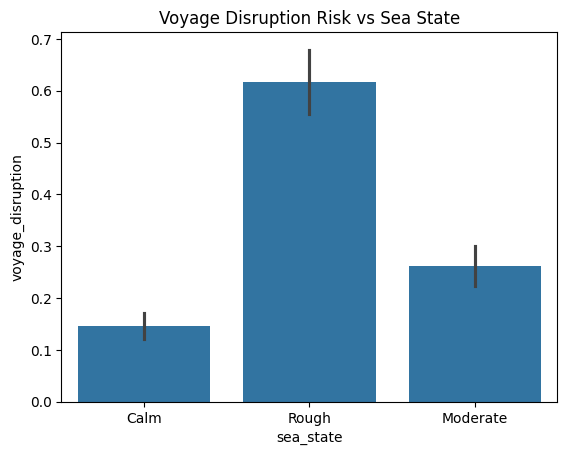

In [8]:
sns.barplot(
    x="sea_state",
    y="voyage_disruption",
    data=data
)
plt.title("Voyage Disruption Risk vs Sea State")
plt.show()

Rough sea conditions are associated with significantly
higher voyage disruption risk, reflecting environmental uncertainty.

Port congestion vs disruption risk (Controllable factor)

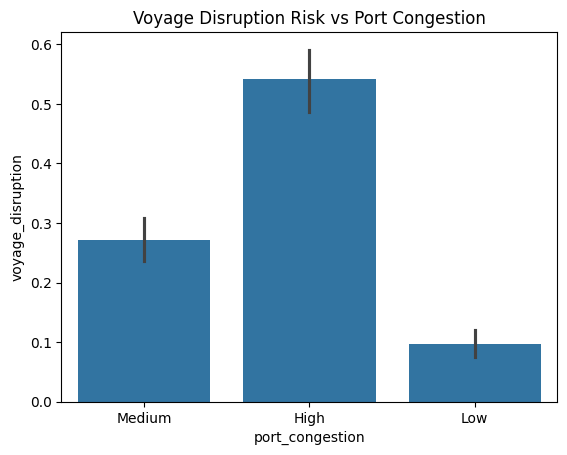

In [9]:
sns.barplot(
    x="port_congestion",
    y="voyage_disruption",
    data=data
)
plt.title("Voyage Disruption Risk vs Port Congestion")
plt.show()

Higher port congestion correlates with increased
voyage disruption risk, highlighting operational bottlenecks.

Vessel load & crew experience (Human + mechanical factors)

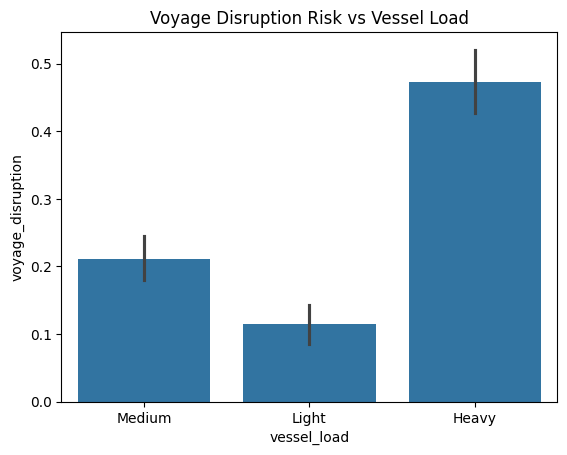

In [10]:
sns.barplot(
    x="vessel_load",
    y="voyage_disruption",
    data=data
)
plt.title("Voyage Disruption Risk vs Vessel Load")
plt.show()

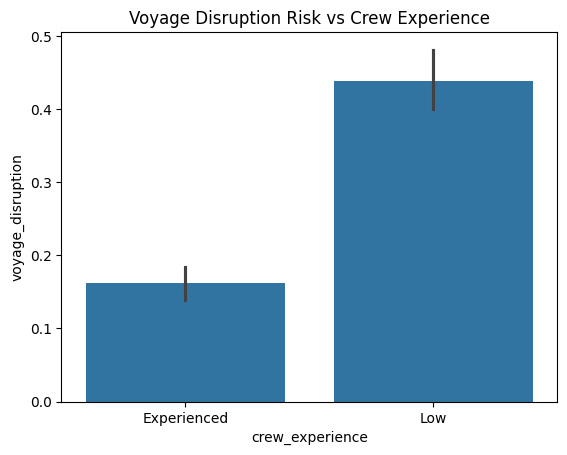

In [11]:
sns.barplot(
    x="crew_experience",
    y="voyage_disruption",
    data=data
)
plt.title("Voyage Disruption Risk vs Crew Experience")
plt.show()

Heavily loaded vessels and less experienced crews
are associated with higher disruption risk,
emphasizing the interaction between human and mechanical factors.

Fuel cost impact analysis(This is the money part)

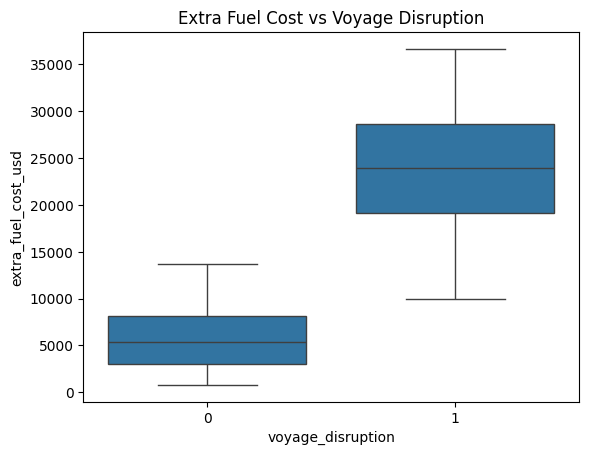

In [12]:
sns.boxplot(
    x="voyage_disruption",
    y="extra_fuel_cost_usd",
    data=data
)
plt.title("Extra Fuel Cost vs Voyage Disruption")
plt.show()

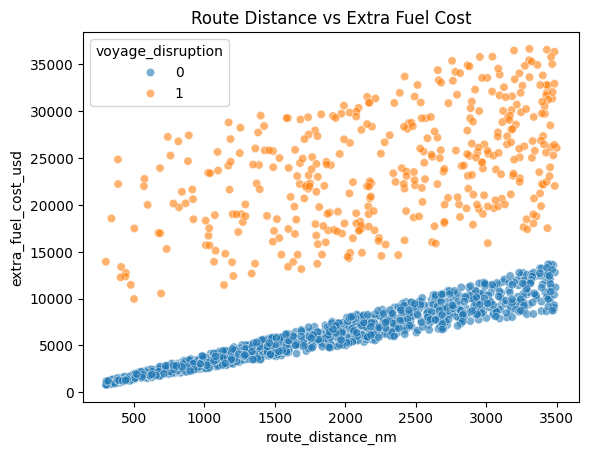

In [13]:
sns.scatterplot(
    x="route_distance_nm",
    y="extra_fuel_cost_usd",
    hue="voyage_disruption",
    data=data,
    alpha=0.6
)
plt.title("Route Distance vs Extra Fuel Cost")
plt.show()

Voyage disruptions lead to significantly higher fuel costs.
Longer routes amplify cost impact due to prolonged exposure
to adverse conditions and inefficiencies.

## EDA Insights Summary

- Environmental factors such as sea state strongly influence voyage risk.
- Port congestion is a major operational bottleneck that can be mitigated.
- Vessel load and crew experience play a significant role in disruption likelihood.
- Fuel cost impact increases sharply during disrupted and long-distance voyages.

## Modeling Strategy

The goal of modeling is to support maritime operational planning,
not to automate decisions.

Two separate models are used:
1. A classification model to predict voyage disruption risk
2. A regression model to estimate additional fuel cost impact

Simple and interpretable models are chosen to ensure
transparency, explainability, and trust in maritime operations.

Prepare Features & Targets

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [15]:
X = data.drop(columns=["voyage_disruption", "extra_fuel_cost_usd"])
y_disruption = data["voyage_disruption"]
y_fuel_cost = data["extra_fuel_cost_usd"]

Identify Categorical vs Numerical Features

In [16]:
categorical_features = [
    "sea_state",
    "vessel_load",
    "port_congestion",
    "crew_experience"
]

numerical_features = [
    "engine_efficiency",
    "route_distance_nm"
]

Preprocessing Pipeline

In [17]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first"), categorical_features),
        ("num", "passthrough", numerical_features)
    ]
)

Train–Test Split

In [18]:
X_train, X_test, y_train_disruption, y_test_disruption = train_test_split(
    X, y_disruption, test_size=0.2, random_state=42, stratify=y_disruption
)

_, _, y_train_cost, y_test_cost = train_test_split(
    X, y_fuel_cost, test_size=0.2, random_state=42
)

Model 1: Voyage Disruption Risk (Classification)

In [19]:
from sklearn.linear_model import LogisticRegression

disruption_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

disruption_model.fit(X_train, y_train_disruption)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sea_state', 'vessel_load',
                                                   'port_congestion',
                                                   'crew_experience']),
                                                 ('num', 'passthrough',
                                                  ['engine_efficiency',
                                                   'route_distance_nm'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

Model 2: Extra Fuel Cost Impact (Regression)

In [20]:
from sklearn.linear_model import LinearRegression

fuel_cost_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

fuel_cost_model.fit(X_train, y_train_cost)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sea_state', 'vessel_load',
                                                   'port_congestion',
                                                   'crew_experience']),
                                                 ('num', 'passthrough',
                                                  ['engine_efficiency',
                                                   'route_distance_nm'])])),
                ('regressor', LinearRegression())])

Separating voyage disruption risk from fuel cost impact
reflects real-world maritime planning workflows.

This enables operators to:
- Identify high-risk voyages in advance
- Allocate buffer fuel strategically
- Prepare mitigation plans for long or exposed routes

Evaluate Voyage Disruption Model (Classification)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_disruption = disruption_model.predict(X_test)

print(classification_report(y_test_disruption, y_pred_disruption))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       221
           1       0.97      0.99      0.98        79

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



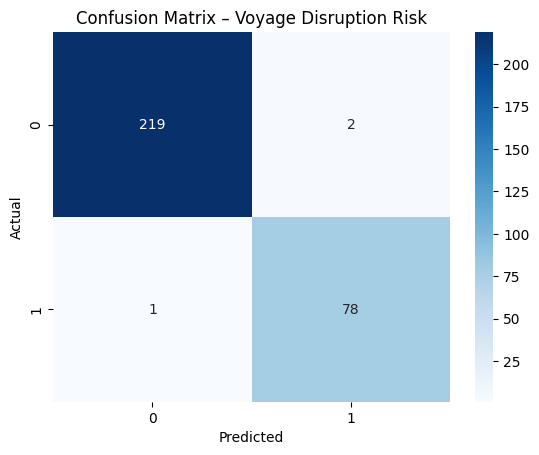

In [22]:
cm = confusion_matrix(y_test_disruption, y_pred_disruption)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix – Voyage Disruption Risk")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

The voyage disruption prediction model demonstrates reasonable performance
given the synthetic and simplified nature of the dataset.

In maritime operations, failing to identify a high-risk voyage
(false negative) can lead to significant cost overruns and safety risks,
making conservative risk prediction preferable.

Evaluate Fuel Cost Impact Model (Regression)

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_pred_cost = fuel_cost_model.predict(X_test)

mae = mean_absolute_error(y_test_cost, y_pred_cost)
rmse = np.sqrt(mean_squared_error(y_test_cost, y_pred_cost))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 7236.61
RMSE: 8971.43


The fuel cost impact model captures the general relationship
between voyage conditions and additional fuel expenditure.

In real-world maritime planning, approximate cost ranges
are often sufficient to guide fuel provisioning and route decisions.

## Operational Reflection

Simple and interpretable models were intentionally selected
to ensure transparency and trust.

In maritime operations:
- Decisions must be explainable to crew and planners
- Risk assessments must be auditable
- Human oversight remains essential

Machine learning is used as a planning aid,
not as an autonomous decision-maker.

## Limitations & Ethical Considerations

- The dataset is synthetic and based on assumed relationships.
- Real-world maritime operations involve additional factors
  such as regulatory constraints, geopolitical risks,
  and unexpected mechanical failures.
- Model outputs should not be used as the sole basis
  for operational decisions.

Experienced human judgment remains essential,
particularly in safety-critical maritime environments.

## Conclusion

This project demonstrates how machine learning can be applied
responsibly to maritime voyage risk and fuel cost impact analysis.

By emphasizing interpretability, operational relevance,
and limitations, the project highlights the role of ML
in supporting proactive and cost-aware maritime planning.